In [47]:
import numpy as np                  # Arrays
import random                       # Random number generation 
import matplotlib.pyplot as plt     # General visualization
import networkx as nx               # Graph visualization 
from libpysal.weights import lat2W  #  Grid adjacency matrix creator

from tqdm import tqdm
import itertools


We model the floor plans of warehouses as graphs; nodes representing locations where stock is shelved and edges indicate an uninterrupted path between two locations.

A general process for making adjacency list representations of such graphs is required.

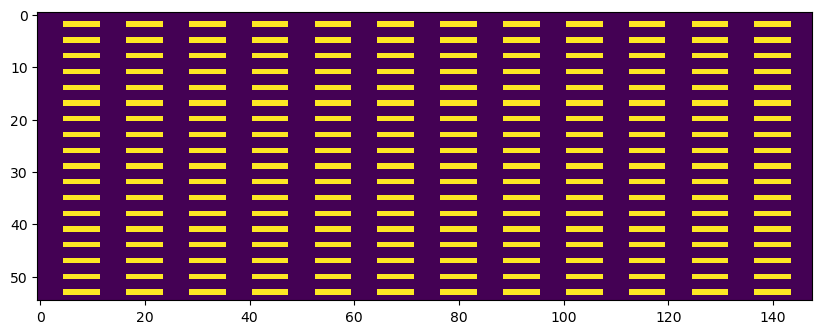

In [46]:
SHELF_SIZE = np.array([2, 8])
GAP_SIZE = np.array([1, 4])
NUM_SHELVES = np.array([18, 12])

GRID_SIZE = NUM_SHELVES*(GAP_SIZE + SHELF_SIZE) + GAP_SIZE

grid = np.zeros(GRID_SIZE)

for index, values in np.ndenumerate(grid):
    if np.all(((index) % (GAP_SIZE + SHELF_SIZE) > GAP_SIZE)):
        grid[index] = 1


plt.figure(figsize = (10, 10))
plt.imshow(grid)
plt.show()



